### INSTRUCTIONS

This assignment has you build a CNN for Image Classification.

There 7 coding tasks in this assignment (Tasks 1 through 7).
 - First review the TensorFlow and Keras videos posted in the Week 3 module on Canvas.
 - Then bookmark and use the keras documentation for this assignment:
https://www.tensorflow.org/api_docs/python/tf/keras
 - Then read through the entire framework below once. Note the parts you need to code up.
 - Then create and compile model as instructed. 
 - Ensure you can explain the number of parameters at each layer, as well as total trainable and non-trainable parameters.
 - Also ensure you are connecting the code back to the theory we covered in class.

NOTE: YOU WILL ONLY EDIT ONE CELL FOR THIS ASSIGNMENT AS PER THE INSTRUCTIONS IN THOSE CELLS.

In [1]:
# !pip install tensorflow

In [2]:
##### DO NOT EDIT THIS CELL!!!
##### DO NOT IMPORT ANY ADDITIONAL PACKAGES

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# keras API documentation:
# https://www.tensorflow.org/api_docs/python/tf/keras
from tensorflow.keras import datasets # https://www.tensorflow.org/api_docs/python/tf/keras/datasets
from tensorflow.keras import layers # https://www.tensorflow.org/api_docs/python/tf/keras/layers
from tensorflow.keras import activations # https://www.tensorflow.org/api_docs/python/tf/keras/activations
from tensorflow.keras import initializers # https://www.tensorflow.org/api_docs/python/tf/keras/initializers
from tensorflow.keras import losses # https://www.tensorflow.org/api_docs/python/tf/keras/losses
from tensorflow.keras import metrics # https://www.tensorflow.org/api_docs/python/tf/keras/metrics
from tensorflow.keras import optimizers # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
from tensorflow.keras import regularizers # https://www.tensorflow.org/api_docs/python/tf/keras/regularizers
from tensorflow.keras.optimizers import schedules # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules
from tensorflow.keras import callbacks # https://www.tensorflow.org/api_docs/python/tf/keras/callbacks
from tensorflow.keras import utils # https://www.tensorflow.org/api_docs/python/tf/keras/utils
from tensorflow.keras import models # https://www.tensorflow.org/api_docs/python/tf/keras/models

In [3]:
##### DO NOT EDIT THIS CELL!!!

# load the MNIST dataset
# - contains 70,000 grayscale images (handwritten digits)
# - images are low resolution (28 by 28 pixels)
# - 10 categories (labeled 0 through 9)
# - 60,000 images in train and 10,000 images in test

mnist = datasets.mnist

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = 10

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

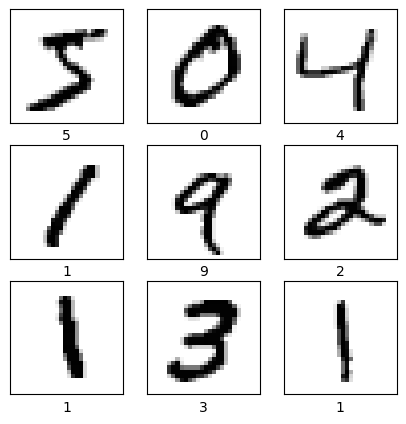

In [4]:
##### DO NOT EDIT THIS CELL!!!

# view a sample of 9 images from the training set
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
##### THIS IS THE ONLY CELL YOU WILL EDIT PER THE ISNTRUCTIONS BELOW

# CREATE model 
# a sequential model is appropriate for a plain stack of layers where each layer 
# has exactly one input tensor and one output tensor.
model = tf.keras.Sequential([
    
    # tell keras the input shape is (28, 28, 1); 
    # sample size is ommitted - only the shape of each sample is specified 
    tf.keras.Input(shape=(28, 28, 1)), 

    # preprocess images to lie in the range 0-1
    layers.experimental.preprocessing.Rescaling(1.0 / 255), 
    
    # Create a pair of convolutional-pooling layers as below (leave everything else at default values)
    #  - Conv2D: 8 filters, kernel size (3,3), strides (1,1), valid padding, relu activation
    #  - MaxPool2D: pool size (2,2), strides (2,2)
    layers.Conv2D(8, (3,3), strides=(1,1), padding='valid', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    
    
    # Create another pair of convolutional-pooling layers as below (leave everything else at default values)
    #  - Conv2D: 16 filters, kernel size (3,3), strides (1,1), valid padding, relu activation
    #  - MaxPool2D: pool size (2,2), strides (2,2)
    layers.Conv2D(16, (3,3), strides=(1,1), padding='valid', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    
    
    # Flatten to get output ready for fully connected layer (leave everything at default values)
    layers.Flatten(),
    
    
    # create dense output layer with 10 nodes and Softmax activation (leave everything else at default values)
    layers.Dense(10, activation='softmax')
    
])

# DISPLAY model architecture
# you should end up with total parameters 5,258  
# ensure you understand the number of parameters in each layer, 
# as well as total number of trainable and non-trainable parameters
model.summary()

# COMPILE model
model.compile(
    
    # use Adam optimizer with learning rate 0.001 (leave everything else at default values)
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
     
    
    # use SparseCategoricalCrossentropy loss (leave everything at default values)
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    
    
    # track accuracy metric
    metrics=['accuracy']
    
) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0

In [6]:
%%time

##### DO NOT EDIT THIS CELL!!!

# TRAIN model 
# ensure you can explain the number of gradient descent steps in each epoch
history = model.fit(
    
    # training set images
    train_images, 
    
    # training set labels
    train_labels, 
    
    # number of epochs to train
    epochs=15,
    
    # mini-batch SGD batch size
    # if None, defaults to 32
    batch_size=128,
    
    # validation set - can use validation_split or validation_data
    validation_split=0.1,
) 

Epoch 1/15
422/422 [==============================] - 32s 69ms/step - loss: 0.5663 - accuracy: 0.8485 - val_loss: 0.1312 - val_accuracy: 0.9632
Epoch 2/15
422/422 [==============================] - 18s 43ms/step - loss: 0.1304 - accuracy: 0.9622 - val_loss: 0.0870 - val_accuracy: 0.9757
Epoch 3/15
422/422 [==============================] - 17s 41ms/step - loss: 0.0933 - accuracy: 0.9719 - val_loss: 0.0703 - val_accuracy: 0.9792
Epoch 4/15
422/422 [==============================] - 18s 42ms/step - loss: 0.0768 - accuracy: 0.9772 - val_loss: 0.0668 - val_accuracy: 0.9817
Epoch 5/15
422/422 [==============================] - 18s 42ms/step - loss: 0.0667 - accuracy: 0.9794 - val_loss: 0.0606 - val_accuracy: 0.9843
Epoch 6/15
422/422 [==============================] - 19s 44ms/step - loss: 0.0596 - accuracy: 0.9818 - val_loss: 0.0547 - val_accuracy: 0.9852
Epoch 7/15
422/422 [==============================] - 19s 44ms/step - loss: 0.0544 - accuracy: 0.9837 - val_loss: 0.0507 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


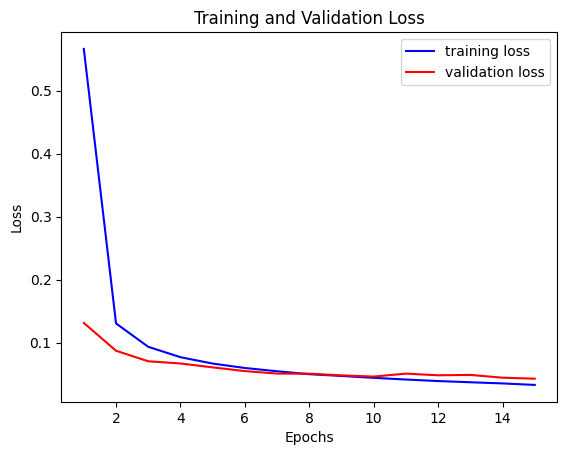

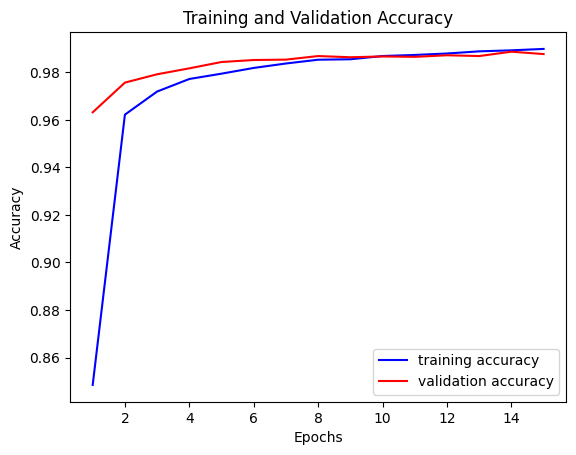

In [7]:
##### DO NOT EDIT THIS CELL!!!

# PLOT loss and accuracy for train and validation data

# model.fit() returns a History object that contains a dictionary with everything that happened during training
# we can use it to plot training/validation loss and training/validation accuracy
history_dict = history.history
print (history_dict.keys())

# plot loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
##### DO NOT EDIT THIS CELL!!!

# EVALUATE model
# you should end up with a test accuracy of ~0.99
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print ("\ntest set loss: ", round(test_loss,4), "\ntest set accuracy: ", round(test_acc,4))

313/313 - 2s - loss: 0.0421 - accuracy: 0.9855 - 2s/epoch - 5ms/step

test set loss:  0.0421 
test set accuracy:  0.9855
